# I. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils.class_weight import compute_sample_weight
import pickle
from joblib import dump, load

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# II. Đọc dữ liệu

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/DS317/df.csv')
df = pd.read_csv('D:\Learning\Semester 1 year 4\DS317\Project\Data\Raw_Data_IncludeCTN_For_Models.csv')

# III. Xây dựng mô hình




In [4]:
X = df.drop(columns={'xeploai'})
y = df['xeploai']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
labels = ['Rớt', 'Trung bình', 'Trung bình khá', 'Khá', 'Giỏi', 'Xuất sắc']

In [7]:
def visualization(y_test, y_pred):
  print('Weighted f1_score: ',f1_score(y_test, y_pred, average='weighted'))
  print('Macro f1_score: ',f1_score(y_test, y_pred, average='macro'))
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

In [8]:
def make_results_df(orginal, res_list):
    df_res = pd.DataFrame({
        'Accuracy': [accuracy_score(orginal, u) for u in res_list],
        'Precision': [precision_score(orginal, u, average='macro') for u in res_list],
        'Recall': [recall_score(orginal, u, average='macro') for u in res_list],
        'F1-macro': [f1_score(orginal, u, average='macro') for u in res_list]
    }, index=['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
    return df_res

In [9]:
# Dữ liệu 2 năm học đầu
X_train = X_train.drop(columns=['diemnamhoc2', 'diemnamhoc3', 'diem_3_5', 'drlnam2', 'drlnam3', 'drl_3_5'])
X_test = X_test.drop(columns=['diemnamhoc2', 'diemnamhoc3', 'diem_3_5', 'drlnam2', 'drlnam3', 'drl_3_5'])

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 5223 to 7270
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mssv            6260 non-null   int64  
 1   soquyetdinh     6260 non-null   int64  
 2   ngaycapvb       6260 non-null   int64  
 3   namsinh         6260 non-null   float64
 4   gioitinh        6260 non-null   float64
 5   noisinh         6260 non-null   int64  
 6   lopsh           6260 non-null   int64  
 7   khoa            6260 non-null   int64  
 8   hedt            6260 non-null   int64  
 9   khoahoc         6260 non-null   float64
 10  chuyennganh2    6260 non-null   int64  
 11  tinhtrang       6260 non-null   float64
 12  diachi_tinhtp   6260 non-null   int64  
 13  diemnamhoc1     6260 non-null   float64
 14  drlnam1         6260 non-null   float64
 15  CCHV            6260 non-null   float64
 16  dien_tt         6260 non-null   int64  
 17  diem_tt         6260 non-null 

## 1. Xét năm học đầu

### a) Decision Tree

In [11]:
model_dt = DecisionTreeClassifier(random_state=42)

In [12]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

Weighted f1_score:  0.8888108306147197
Macro f1_score:  0.6285227589354947
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1165
           1       0.94      0.89      0.91        18
           2       0.39      0.32      0.35        50
           3       0.69      0.70      0.70       227
           4       0.59      0.64      0.61       102
           5       0.20      0.25      0.22         4

    accuracy                           0.89      1566
   macro avg       0.63      0.63      0.63      1566
weighted avg       0.89      0.89      0.89      1566



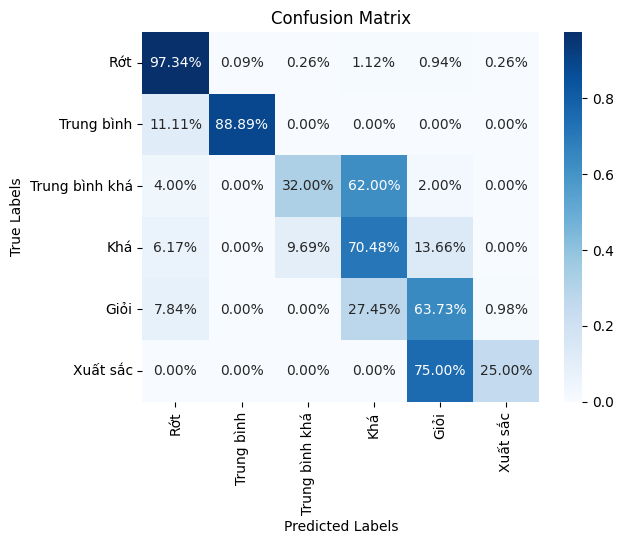

In [13]:
visualization(y_test, y_pred_dt)

### b) Random Forest

In [14]:
model_rf = RandomForestClassifier(random_state=42)

In [15]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

Weighted f1_score:  0.9003456359265269
Macro f1_score:  0.5725726035217641
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.80      0.89      0.84        18
           2       0.55      0.12      0.20        50
           3       0.69      0.86      0.76       227
           4       0.65      0.65      0.65       102
           5       0.00      0.00      0.00         4

    accuracy                           0.91      1566
   macro avg       0.61      0.58      0.57      1566
weighted avg       0.90      0.91      0.90      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

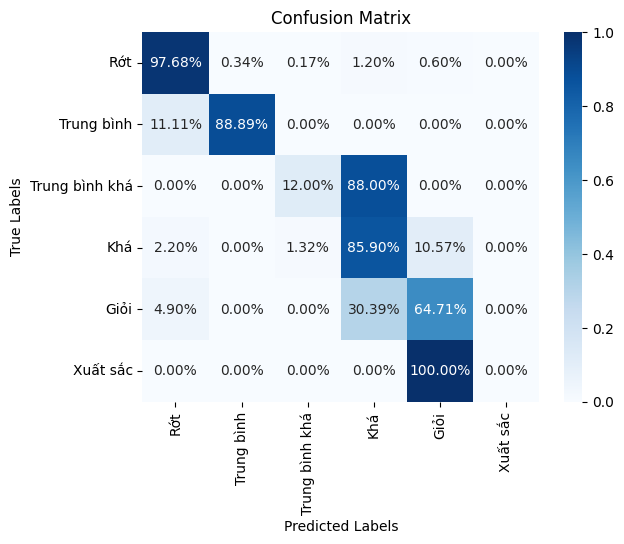

In [16]:
visualization(y_test, y_pred_rf)

### c) XGBoost

In [17]:
model_xg = XGBClassifier(random_state=42)

In [18]:
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)

Weighted f1_score:  0.903704174916635
Macro f1_score:  0.6047148354779939
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.89      0.89      0.89        18
           2       0.50      0.30      0.37        50
           3       0.71      0.82      0.76       227
           4       0.62      0.63      0.62       102
           5       0.00      0.00      0.00         4

    accuracy                           0.91      1566
   macro avg       0.62      0.60      0.60      1566
weighted avg       0.90      0.91      0.90      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

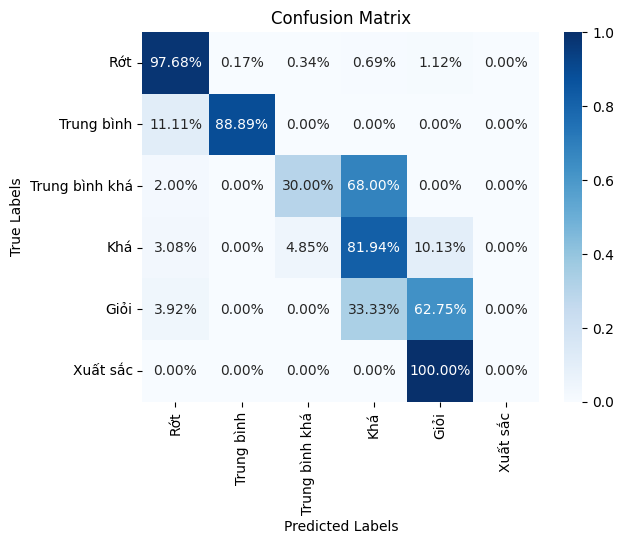

In [19]:
visualization(y_test, y_pred_xg)

### d) LightGBM

In [20]:
model_lgb = lgb.LGBMClassifier(objective='multiclass', num_class=6, random_state=42)

In [21]:
model_lgb.fit(X_train, y_train)
y_pred_lg = model_lgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1735
[LightGBM] [Info] Number of data points in the train set: 6260, number of used features: 22
[LightGBM] [Info] Start training from score -0.276878
[LightGBM] [Info] Start training from score -4.209336
[LightGBM] [Info] Start training from score -3.673031
[LightGBM] [Info] Start training from score -1.945112
[LightGBM] [Info] Start training from score -2.861402
[LightGBM] [Info] Start training from score -6.544711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Weighted f1_score:  0.9083910606635853
Macro f1_score:  0.6186739063392759
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1165
           1       0.94      0.89      0.91        18
           2       0.53      0.32      0.40        50
           3       0.72      0.83      0.77       227
           4       0.64      0.64      0.64       102
           5       0.00      0.00      0.00         4

    accuracy                           0.91      1566
   macro avg       0.64      0.61      0.62      1566
weighted avg       0.91      0.91      0.91      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

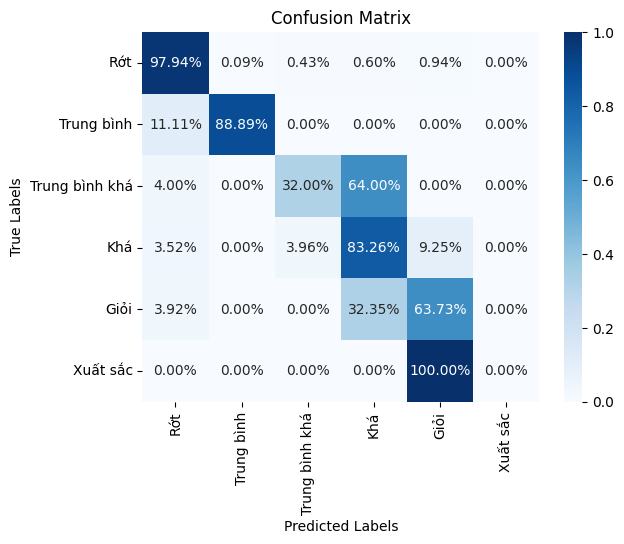

In [22]:
visualization(y_test, y_pred_lg)

### e) CatBoost

In [23]:
model_cb = CatBoostClassifier(random_state=42)

In [24]:
model_cb.fit(X_train, y_train)
y_pred_cb = model_cb.predict(X_test)

Learning rate set to 0.086886
0:	learn: 1.4855181	total: 178ms	remaining: 2m 57s
1:	learn: 1.2706509	total: 189ms	remaining: 1m 34s
2:	learn: 1.1156563	total: 197ms	remaining: 1m 5s
3:	learn: 0.9991745	total: 203ms	remaining: 50.7s
4:	learn: 0.9081555	total: 210ms	remaining: 41.8s
5:	learn: 0.8254929	total: 215ms	remaining: 35.7s
6:	learn: 0.7590273	total: 221ms	remaining: 31.3s
7:	learn: 0.7029548	total: 227ms	remaining: 28.1s
8:	learn: 0.6539739	total: 232ms	remaining: 25.6s
9:	learn: 0.6093530	total: 237ms	remaining: 23.5s
10:	learn: 0.5704386	total: 243ms	remaining: 21.8s
11:	learn: 0.5383737	total: 248ms	remaining: 20.4s
12:	learn: 0.5084465	total: 253ms	remaining: 19.2s
13:	learn: 0.4822553	total: 259ms	remaining: 18.2s
14:	learn: 0.4561424	total: 265ms	remaining: 17.4s
15:	learn: 0.4346178	total: 270ms	remaining: 16.6s
16:	learn: 0.4134659	total: 276ms	remaining: 16s
17:	learn: 0.3968910	total: 284ms	remaining: 15.5s
18:	learn: 0.3813366	total: 291ms	remaining: 15s
19:	learn: 0.

Weighted f1_score:  0.8973452978635846
Macro f1_score:  0.5753414574459291
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1165
           1       0.78      0.78      0.78        18
           2       0.43      0.24      0.31        50
           3       0.71      0.81      0.76       227
           4       0.60      0.67      0.63       102
           5       0.00      0.00      0.00         4

    accuracy                           0.90      1566
   macro avg       0.58      0.58      0.58      1566
weighted avg       0.90      0.90      0.90      1566



c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

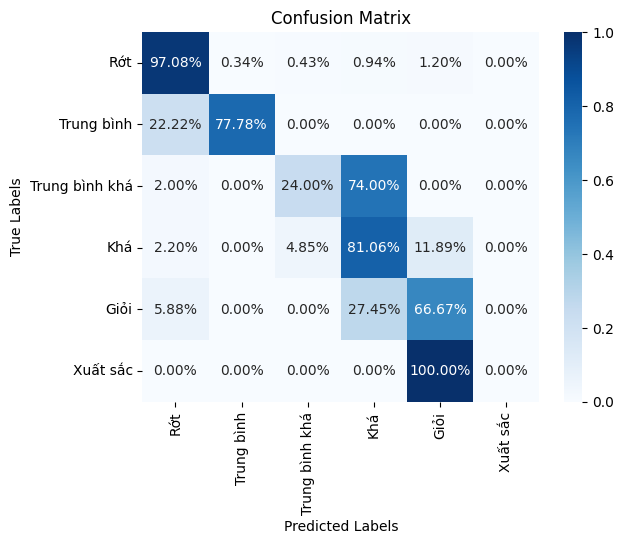

In [25]:
visualization(y_test, y_pred_cb)

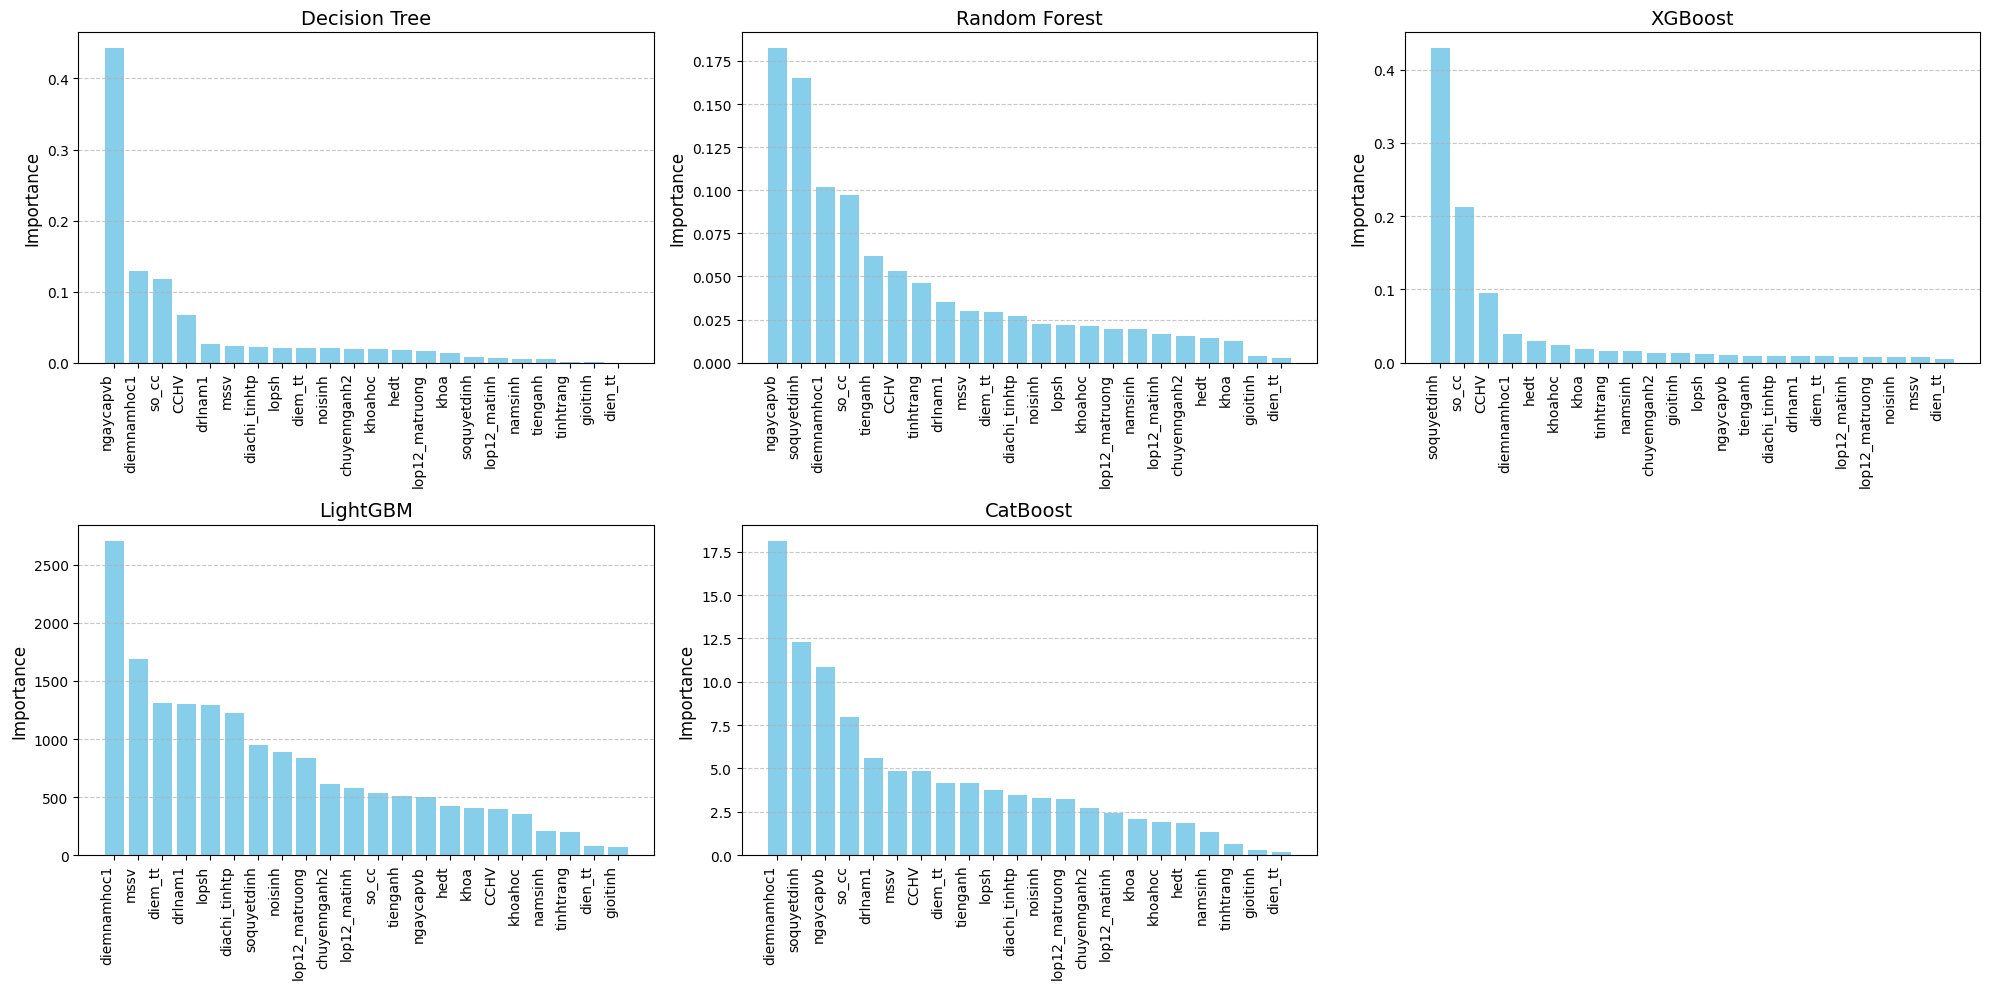

In [26]:
models = [model_dt, model_rf, model_xg, model_lgb, model_cb]  # Danh sách mô hình
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']  # Tên mô hình
feature_names = X_train.columns  # Tên đặc trưng

# Tạo figure và lưới 2x3
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Duyệt qua các trục như một danh sách

# Vòng lặp qua từng mô hình
for i, model in enumerate(models):
    # Lấy giá trị feature importance từ model
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sắp xếp theo thứ tự giảm dần
    sorted_features = [feature_names[idx] for idx in indices]

    # Vẽ biểu đồ bar trên subplot tương ứng
    ax = axes[i]
    ax.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
    ax.set_xticks(range(len(importances)))
    ax.set_xticklabels(sorted_features, rotation=90, ha='right', fontsize=10)
    ax.set_title(model_names[i], fontsize=14)
    ax.set_ylabel('Importance', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Xóa ô thừa (ô trống nếu có)
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

# Tự động căn chỉnh bố cục
plt.tight_layout()
plt.show()

# IV. Kết quả

In [27]:
df_res = make_results_df(y_test, [y_pred_dt, y_pred_rf, y_pred_xg, y_pred_lg, y_pred_cb])

c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NITRO 5\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [28]:
df_res

,Accuracy,Precision,Recall,F1-macro
Decision Tree,0.888889,0.630708,0.629063,0.628523
Random Forest,0.907407,0.612517,0.581967,0.572573
XGBoost,0.906130,0.617007,0.602091,0.604715
LightGBM,0.911239,0.638064,0.609690,0.618674
CatBoost,0.899745,0.583644,0.577639,0.575341
